In [1]:
from scipy.io import loadmat
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
import scipy.spatial as spatial
import local_linear


In [2]:
def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [3]:
fn = r"C:\Users\water\OneDrive\Desktop\filtered_Ymaze_ephys_data.mat"
d = loadmat(fn)
lfp = d['filtered_LFP']

In [4]:
fs = 1000
fc = 150
filtlp = lambda x: butter_lowpass_filter(x,fc,fs);
flfp = np.apply_along_axis(filtlp,1,lfp)
flfp = flfp[:,100000:800000]

In [5]:
ndcs = 6
dc_step = 2*np.ceil(fs/fc).astype(int)
new_time = flfp.shape[1]-ndcs*dc_step
dclfp = np.zeros([flfp.shape[0],new_time,ndcs])
for q in range(ndcs):
    dclfp[:,:,q] = flfp[:,(q*dc_step):(new_time+(q*dc_step))]

In [23]:
tree = spatial.KDTree(np.array(dclfp[0]))
radius = 100
neighbors = tree.query_ball_tree(tree, radius)
frequency = list(map(len, neighbors))
loc = np.argmax(frequency)

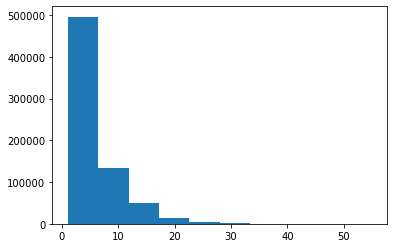

In [24]:
plt.figure()
plt.hist(frequency)
plt.show()

In [25]:
valid_neigh = np.array(neighbors[loc])[[np.where(np.diff(neighbors[loc])>100)[0]]]
samples = []
for neigh in valid_neigh:
    samples.append(dclfp[0][neigh:neigh+200])
samples=np.stack(samples)
# [time,instance,dim]
samples = samples.transpose([1,0,2])

C:\Users\water\AppData\Local\Temp/ipykernel_1648/3379354095.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  valid_neigh = np.array(neighbors[loc])[[np.where(np.diff(neighbors[loc])>100)[0]]]


In [26]:
As,frame_ass = local_linear.local_linear(samples,l_frame=1)

In [27]:
ne = []
ee = []
mv = []
for A in As:
    e,v = np.linalg.eig(A[1:6,1:6])
    ne.append(len(np.where(np.real(e)>0)[0]))
    ee.append(e)
    mv.append(v)
ee = np.stack(ee)

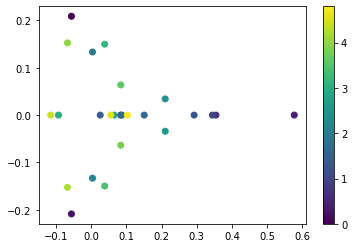

In [28]:
plt.figure();
plt.scatter(np.real(ee[:5]),np.imag(ee[:5]),c=np.arange(0,5,1/5))
plt.colorbar()
plt.show()


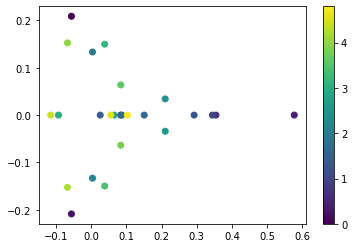

In [13]:
plt.figure();
plt.scatter(np.real(ee[:5]),np.imag(ee[:5]),c=np.arange(0,5,1/5))
plt.colorbar()
plt.show()


C:\Users\water\AppData\Local\Temp/ipykernel_1648/3013533199.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  valid_neigh = np.array(neighbors[loc])[[np.where(np.diff(neighbors[loc])>100)[0]]]


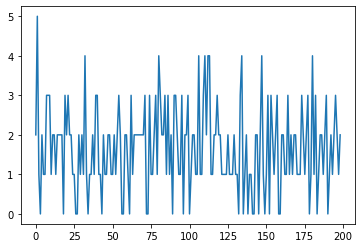

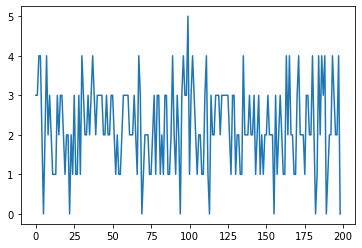

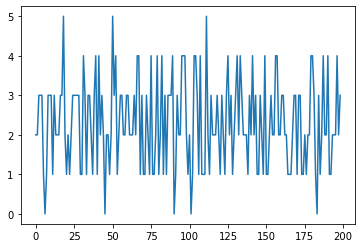

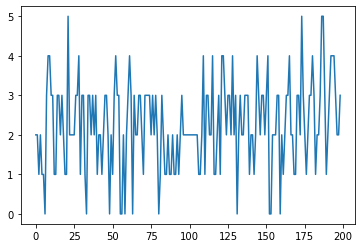

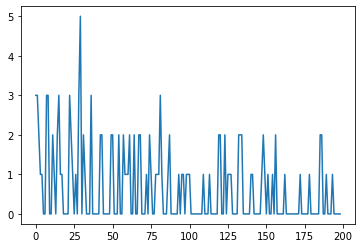

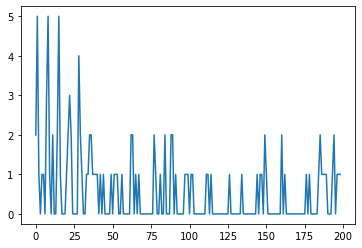

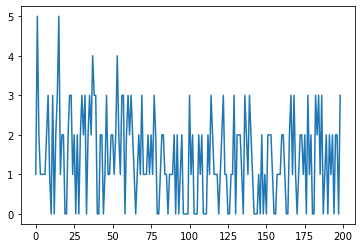

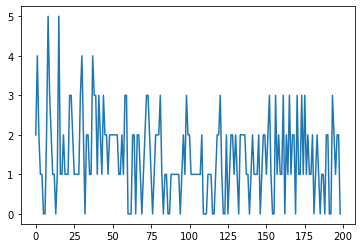

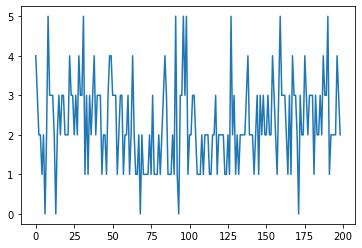

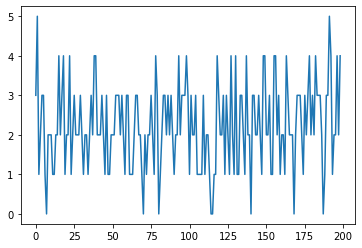

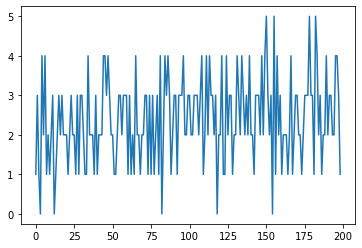

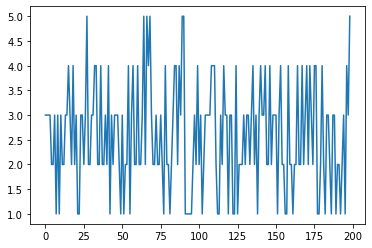

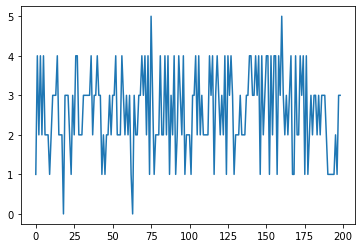

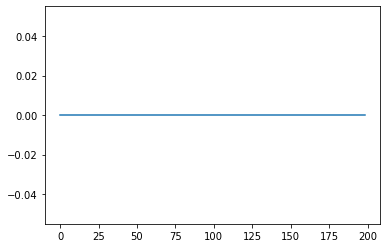

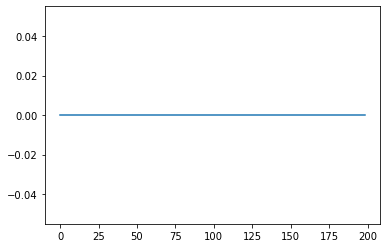

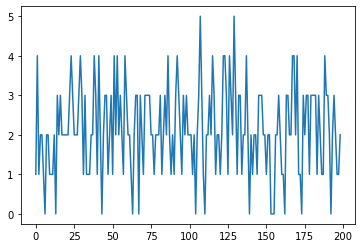

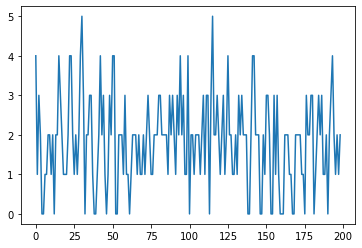

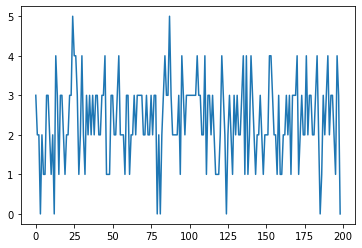

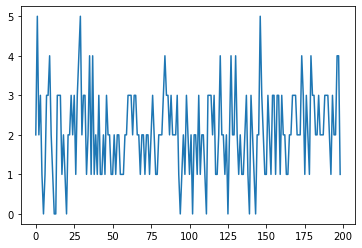

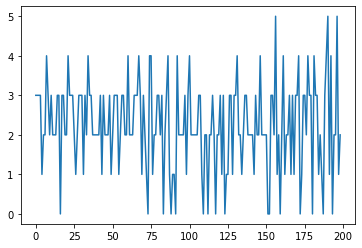

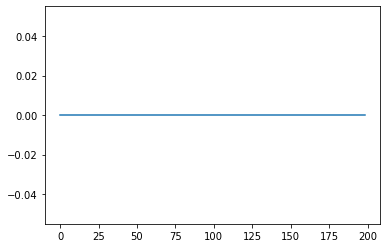

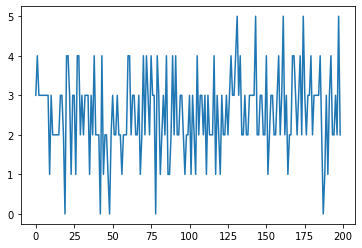

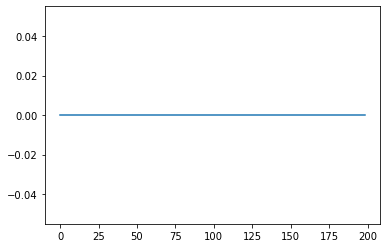

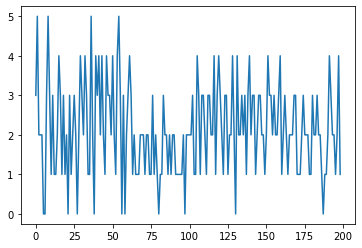

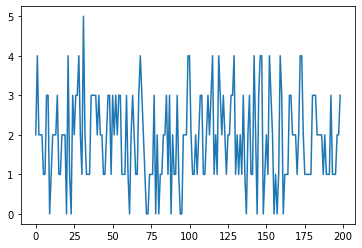

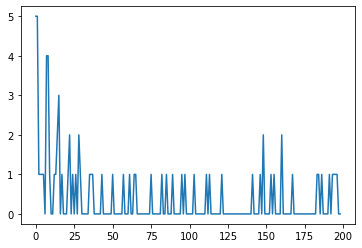

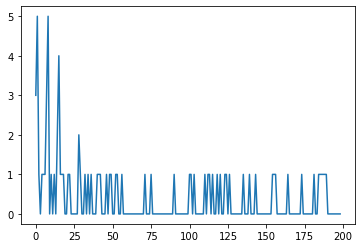

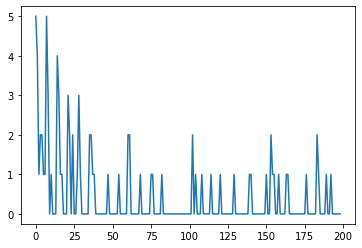

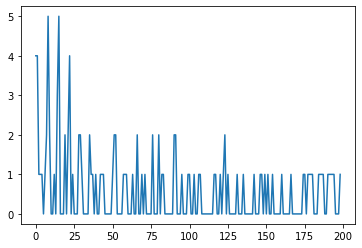

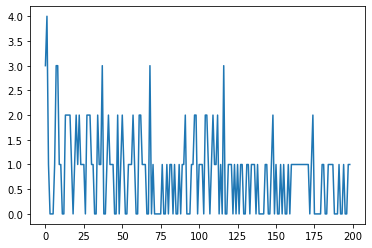

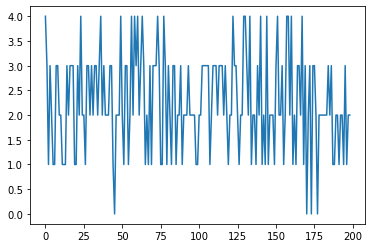

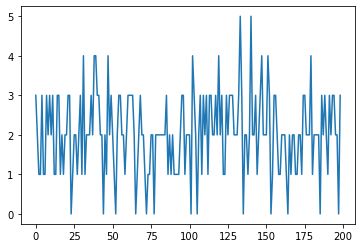

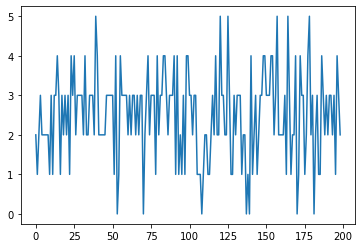

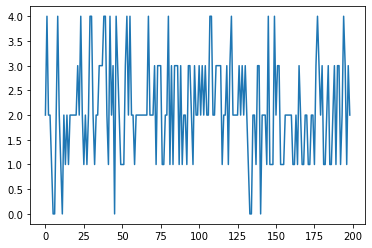

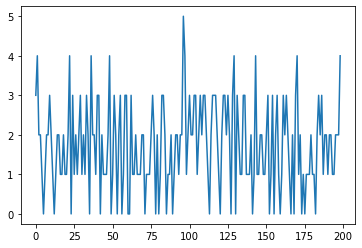

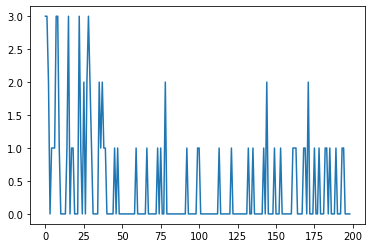

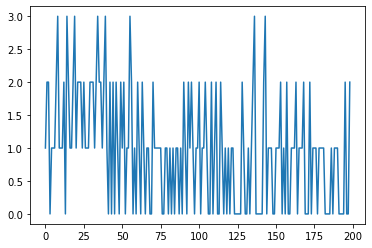

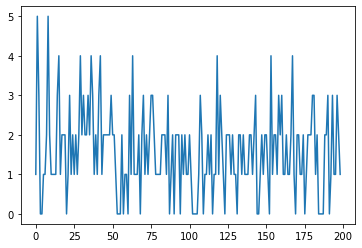

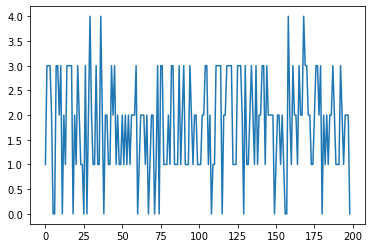

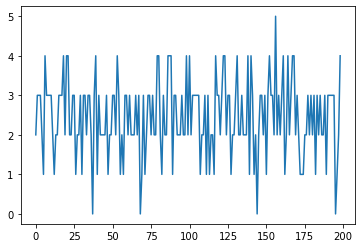

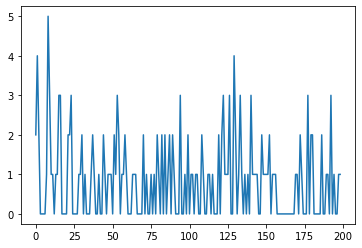

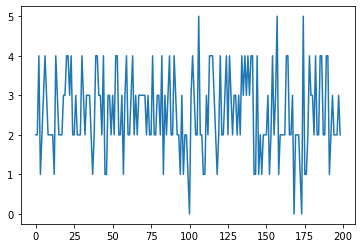

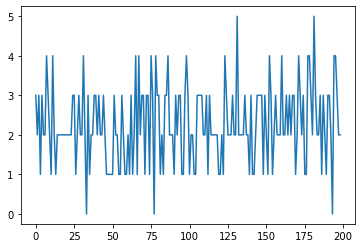

In [22]:
for tdclfp in dclfp:
    tree = spatial.KDTree(np.array(tdclfp[::2,:]))
    radius = 100
    neighbors = tree.query_ball_tree(tree, radius)
    frequency = list(map(len, neighbors))
    loc = np.argmax(frequency)
    valid_neigh = np.array(neighbors[loc])[[np.where(np.diff(neighbors[loc])>100)[0]]]
    samples = []
    for neigh in valid_neigh:
        samples.append(tdclfp[::2,:][neigh:neigh+200])
    if samples:
        samples=np.stack(samples)
    else:
        continue
    # [time,instance,dim]
    samples = samples.transpose([1,0,2])
    As,frame_ass = local_linear.local_linear(samples,l_frame=1)
    ne = []
    ee = []
    mv = []
    for A in As:
        e,v = np.linalg.eig(A[1:6,1:6])
        ne.append(len(np.where(np.real(e)>0)[0]))
        ee.append(e)
        mv.append(v)
    plt.figure();
    plt.plot(ne)
    plt.show()


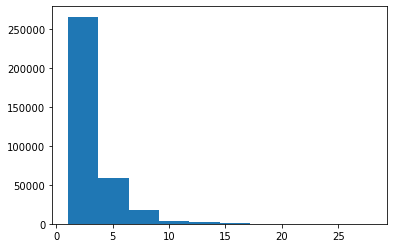

C:\Users\water\AppData\Local\Temp/ipykernel_1648/3643853561.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  valid_neigh = np.array(neighbors[loc])[[np.where(np.diff(neighbors[loc])>100)[0]]]


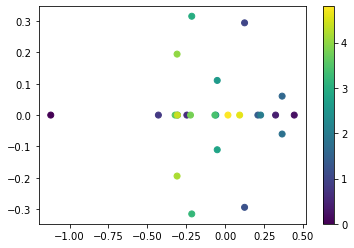

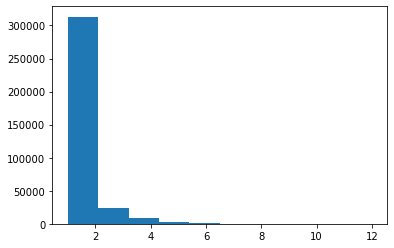

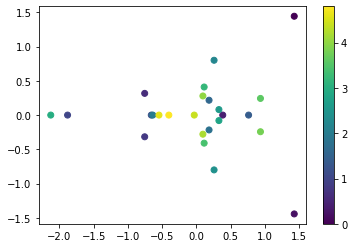

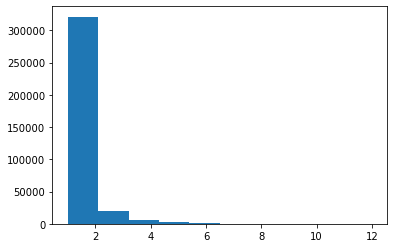

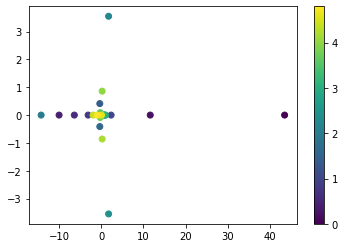

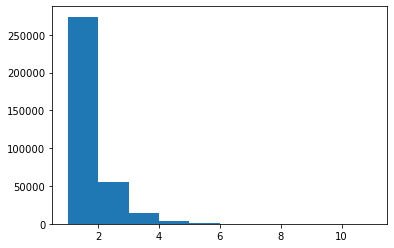

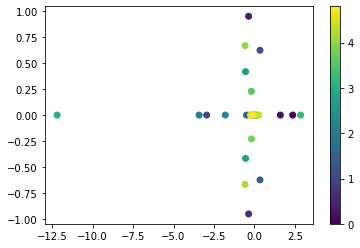

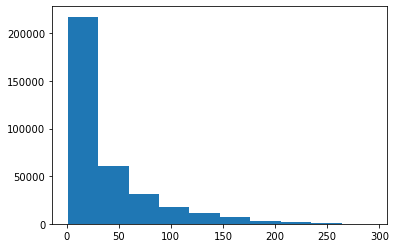

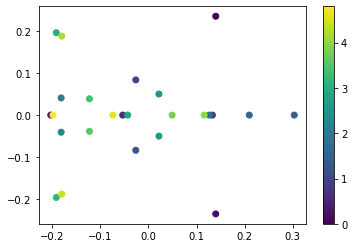

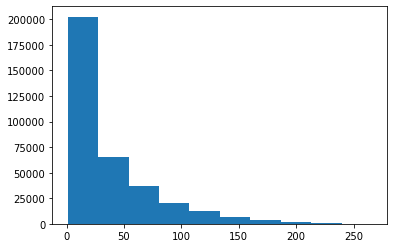

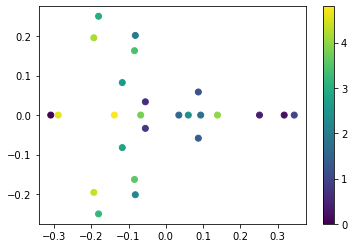

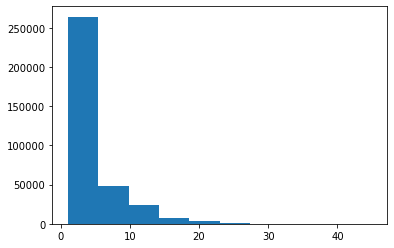

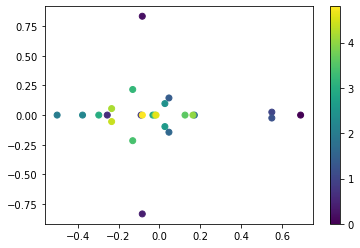

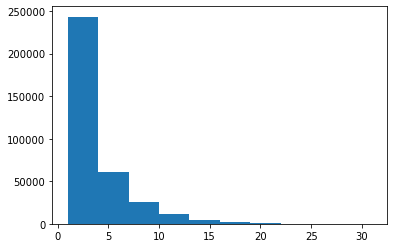

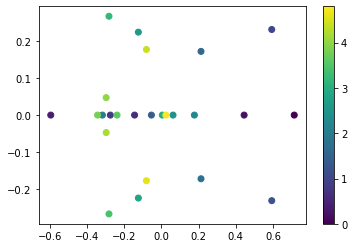

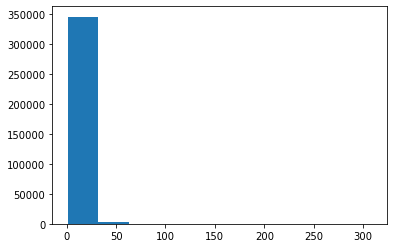

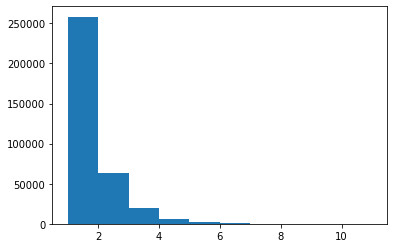

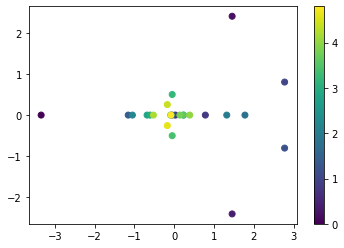

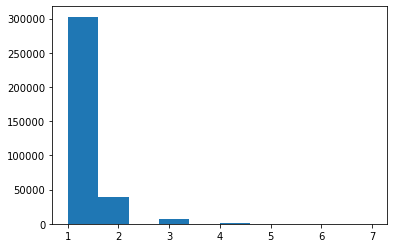

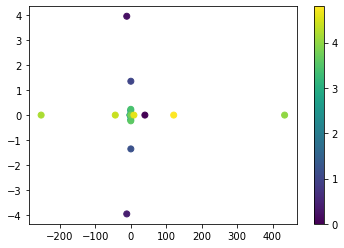

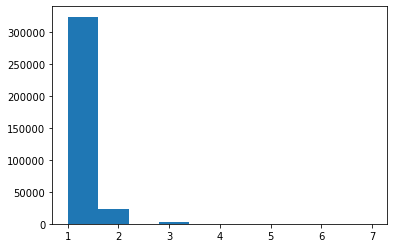

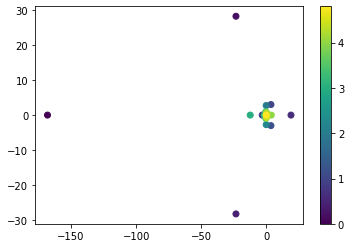

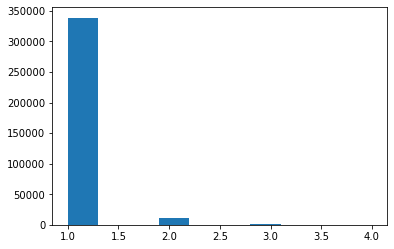

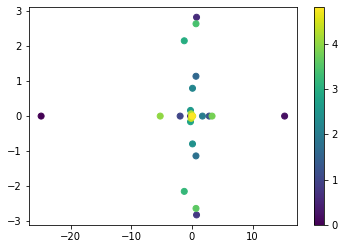

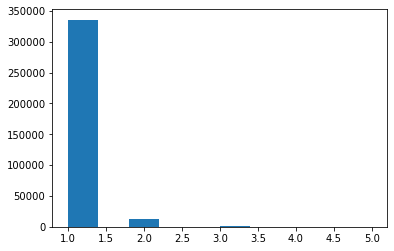

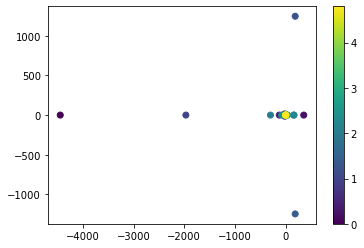

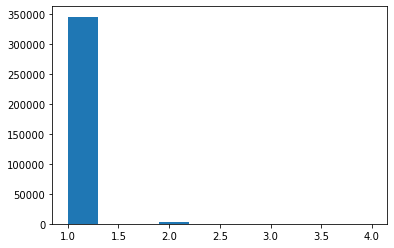

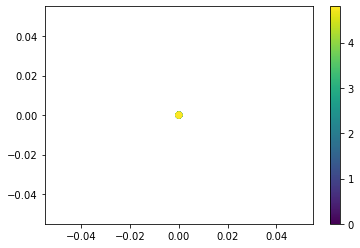

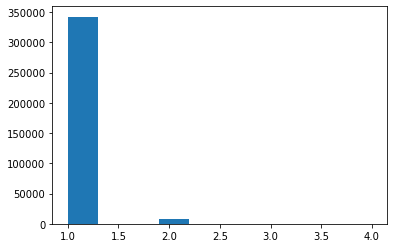

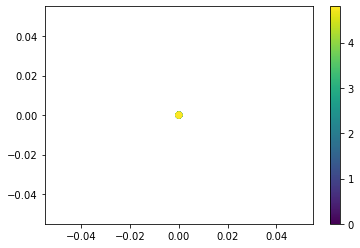

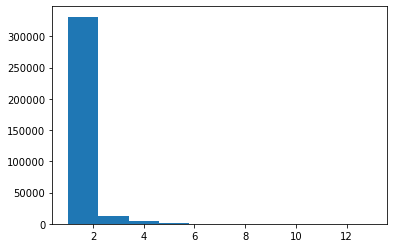

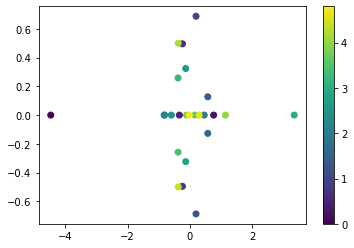

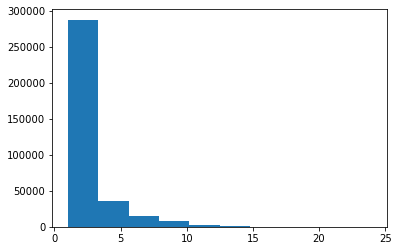

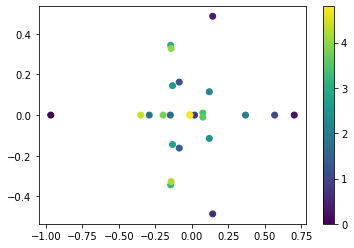

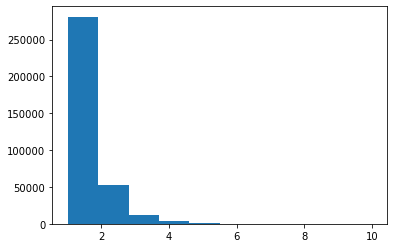

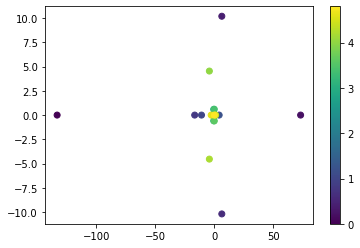

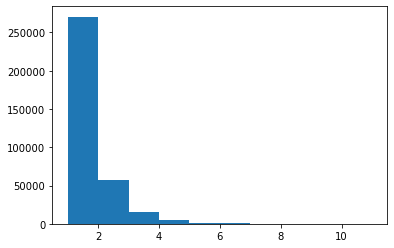

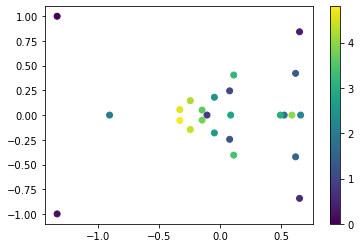

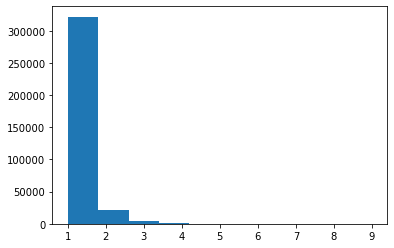

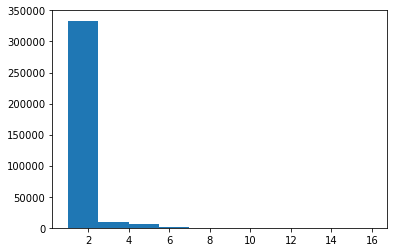

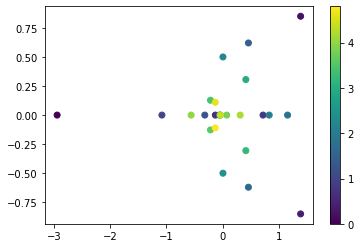

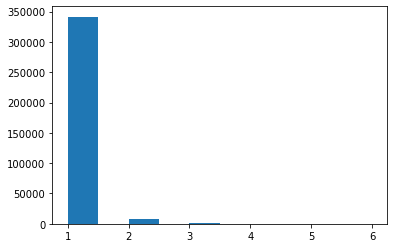

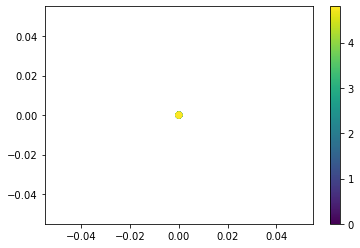

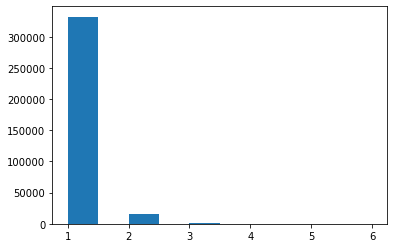

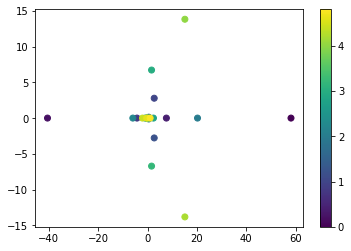

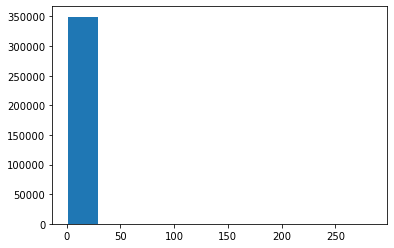

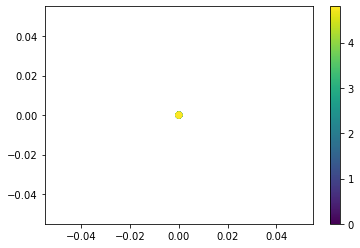

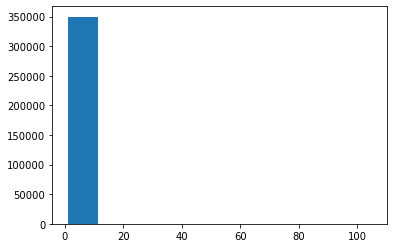

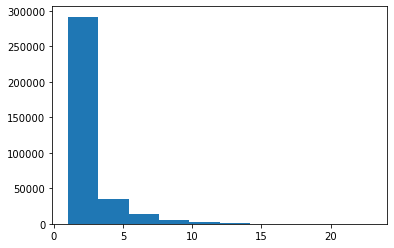

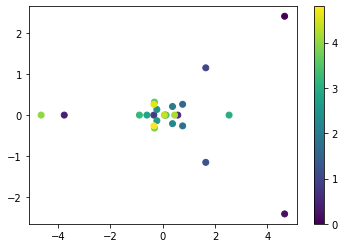

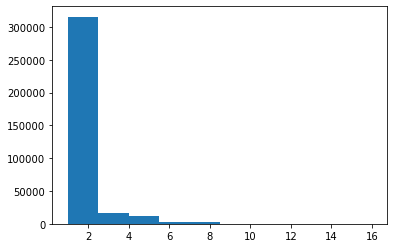

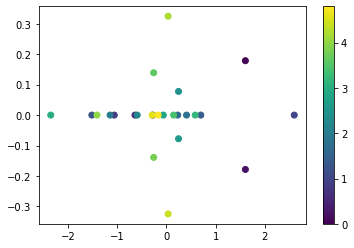

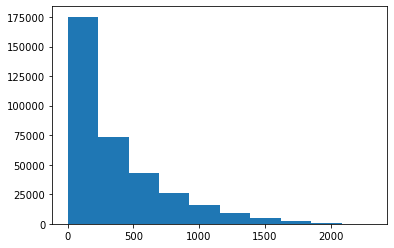

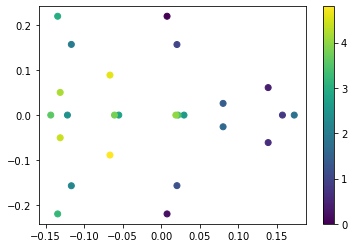

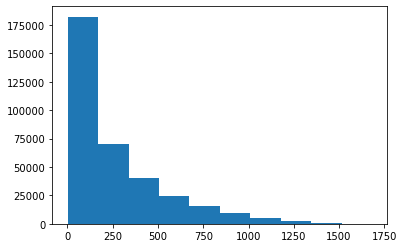

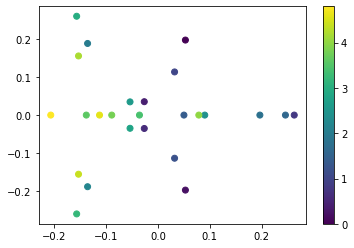

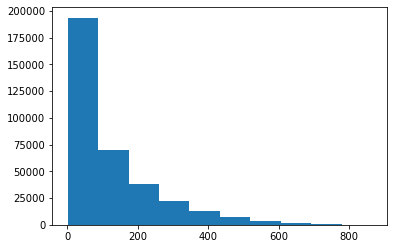

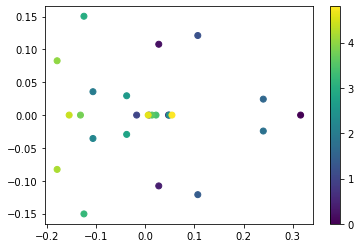

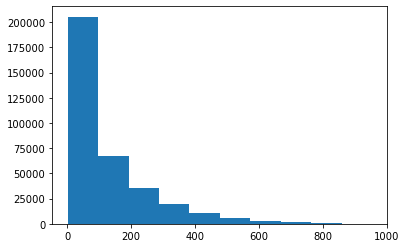

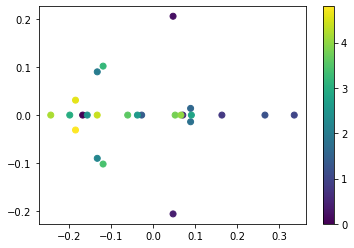

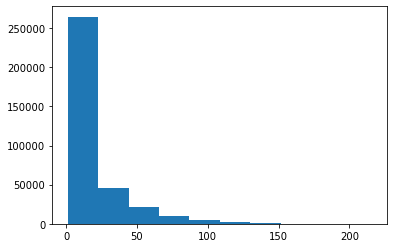

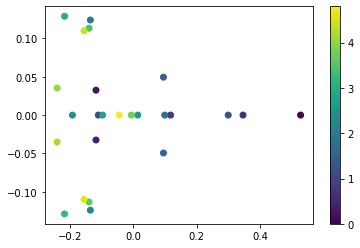

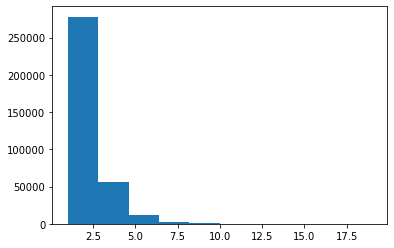

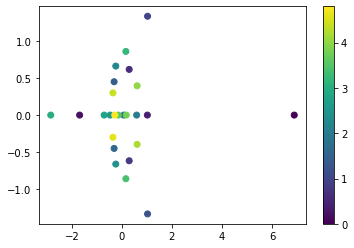

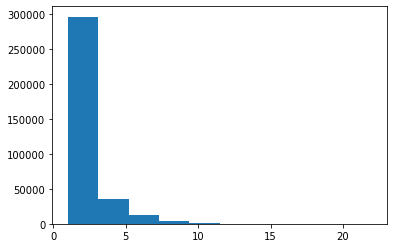

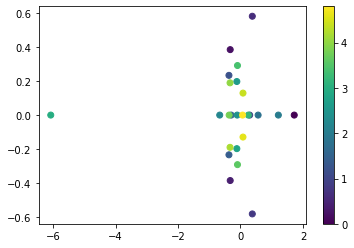

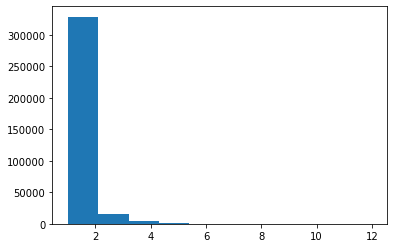

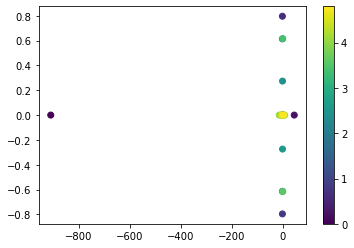

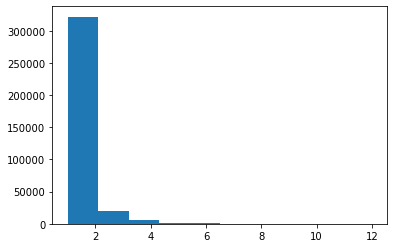

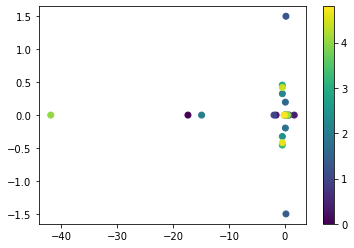

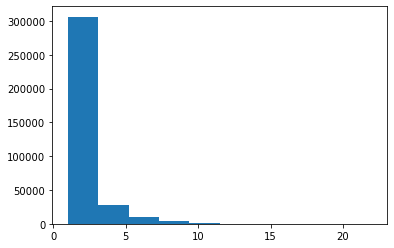

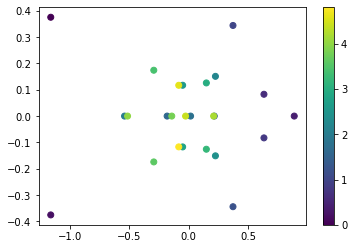

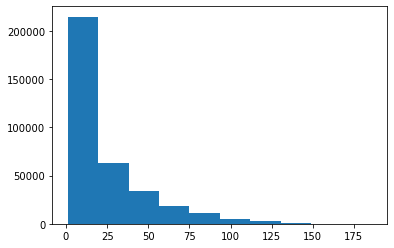

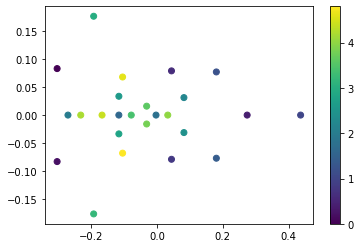

KeyboardInterrupt: 

In [19]:
for tdclfp in dclfp:
    tree = spatial.KDTree(np.array(tdclfp[::2,:]))
    radius = 100
    neighbors = tree.query_ball_tree(tree, radius)
    frequency = list(map(len, neighbors))
    loc = np.argmax(frequency)
    plt.figure()
    plt.hist(frequency)
    plt.show()
    valid_neigh = np.array(neighbors[loc])[[np.where(np.diff(neighbors[loc])>100)[0]]]
    samples = []
    for neigh in valid_neigh:
        samples.append(tdclfp[::2,:][neigh:neigh+200])
    if samples:
        samples=np.stack(samples)
    else:
        continue
    # [time,instance,dim]
    samples = samples.transpose([1,0,2])
    As,frame_ass = local_linear.local_linear(samples,l_frame=1)
    ne = []
    ee = []
    mv = []
    for A in As:
        e,v = np.linalg.eig(A[1:6,1:6])
        ne.append(len(np.where(np.real(e)>0)[0]))
        ee.append(e)
        mv.append(v)
    ee = np.stack(ee)
    plt.figure();
    plt.scatter(np.real(ee[:5]),np.imag(ee[:5]),c=np.arange(0,5,1/5))
    plt.colorbar()
    plt.show()


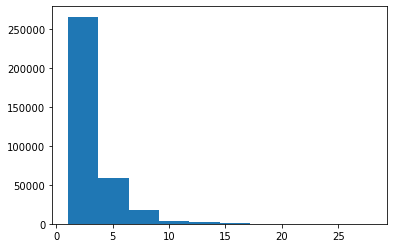

C:\Users\water\AppData\Local\Temp/ipykernel_1648/3820590540.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  valid_neigh = np.array(neighbors[loc])[[np.where(np.diff(neighbors[loc])>100)[0]]]


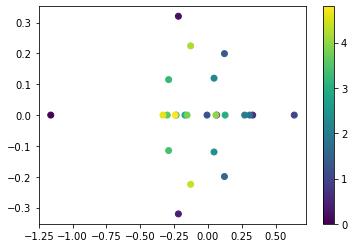

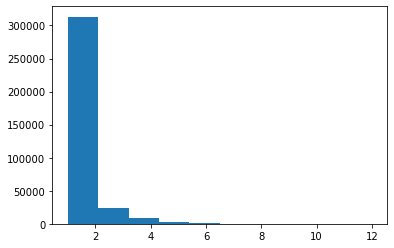

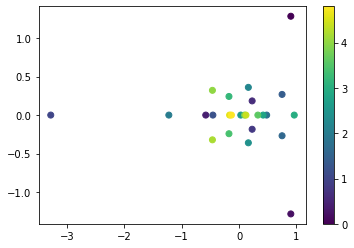

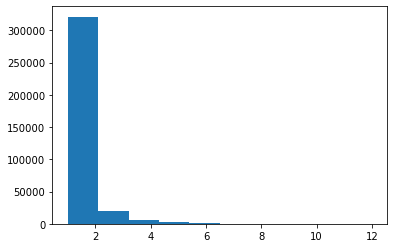

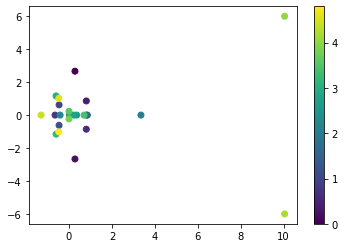

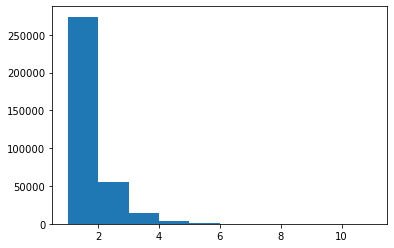

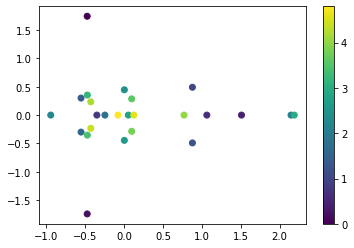

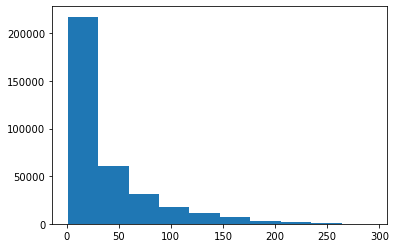

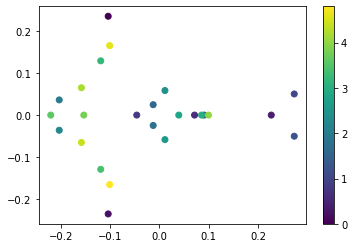

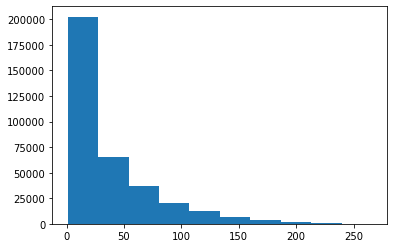

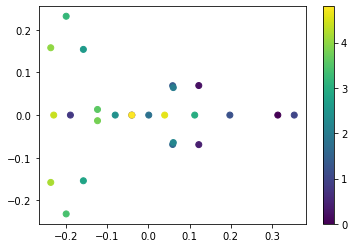

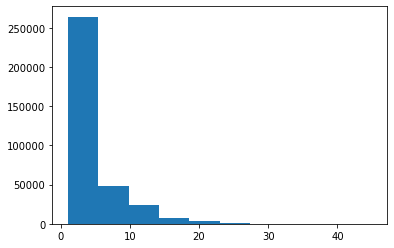

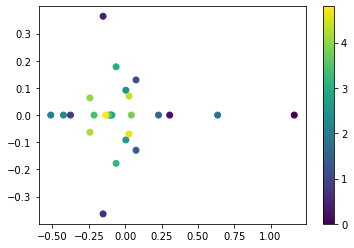

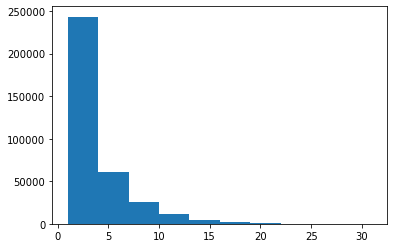

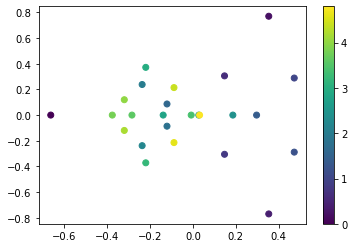

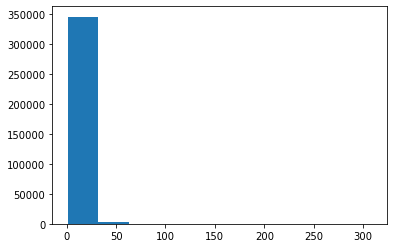

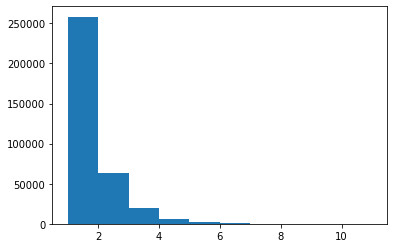

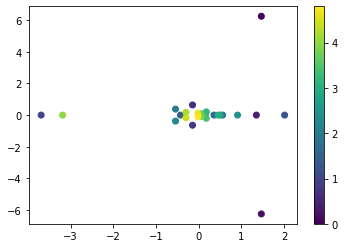

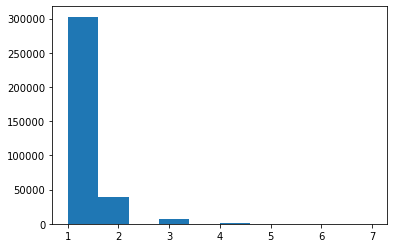

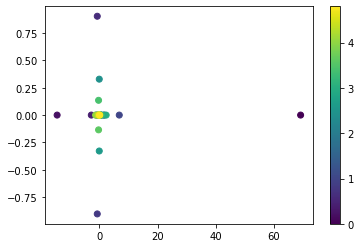

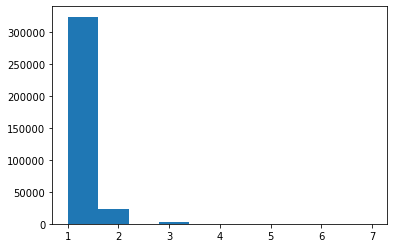

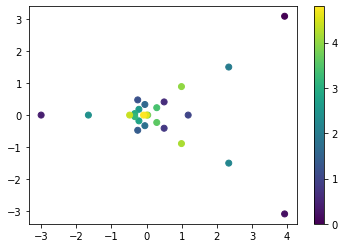

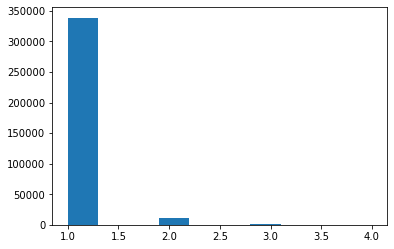

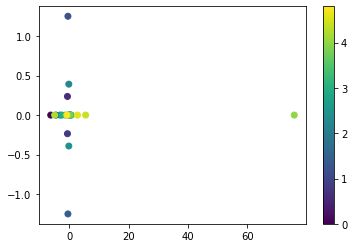

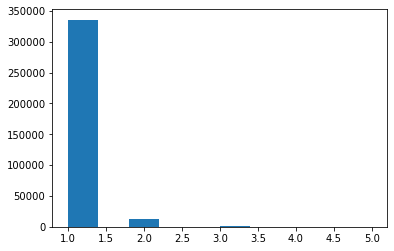

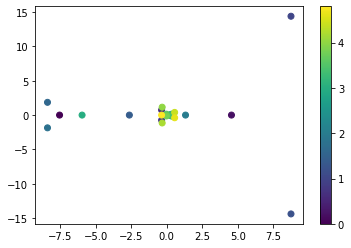

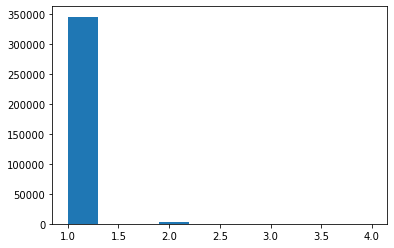

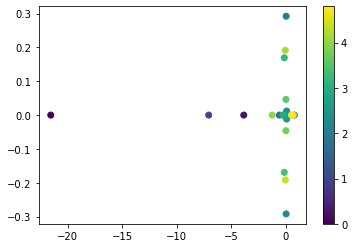

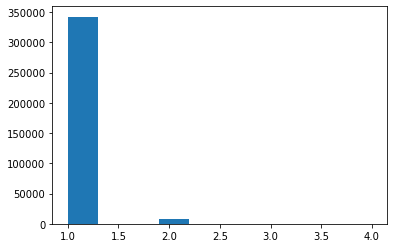

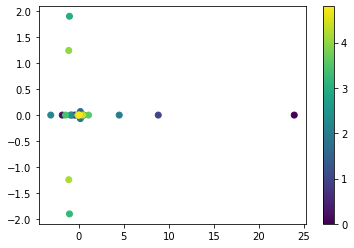

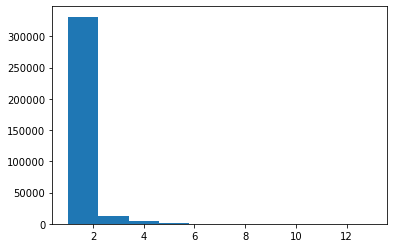

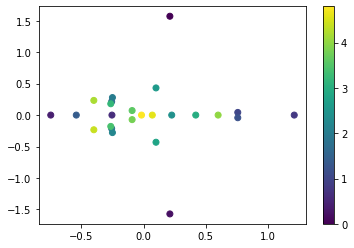

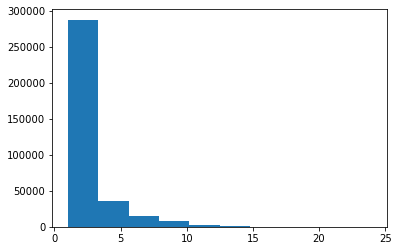

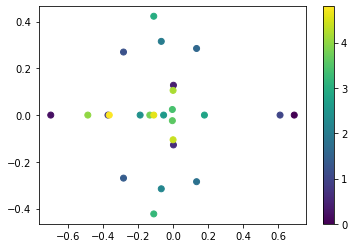

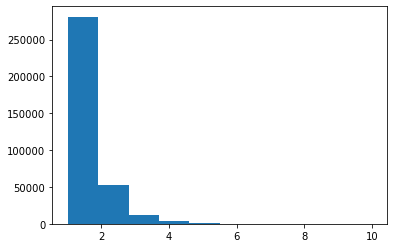

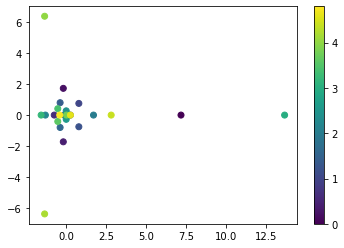

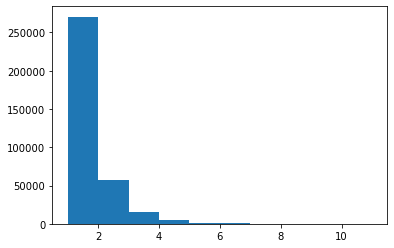

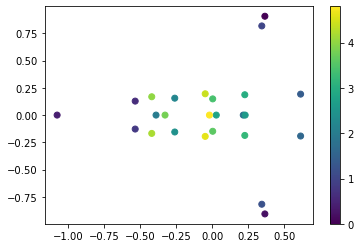

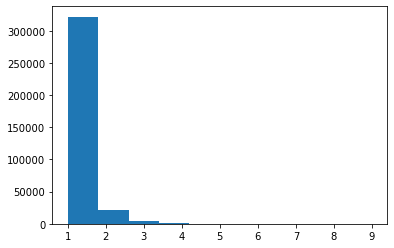

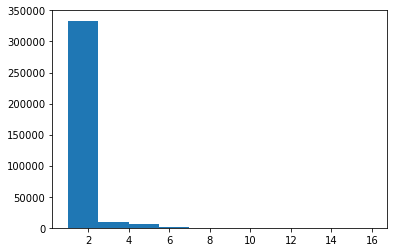

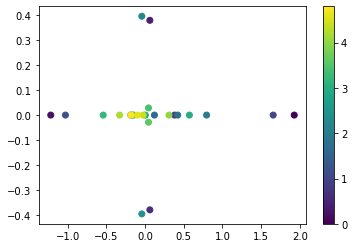

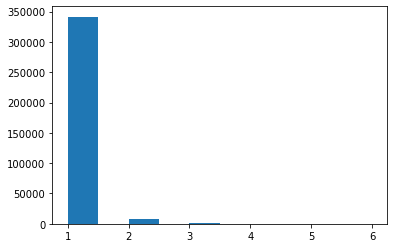

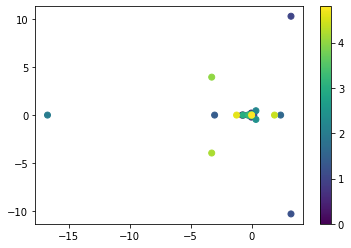

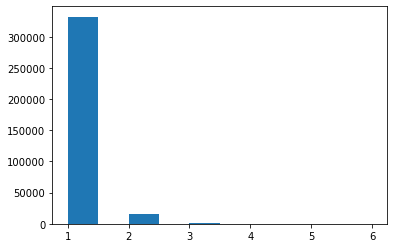

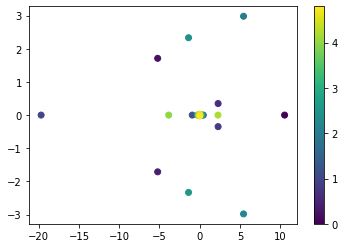

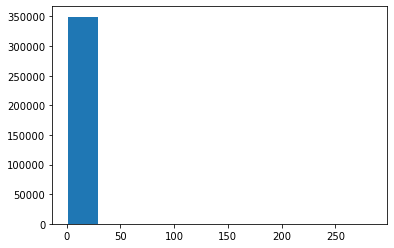

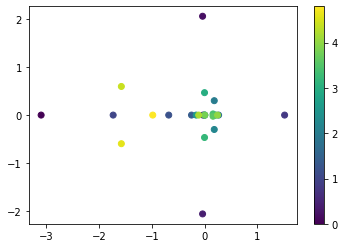

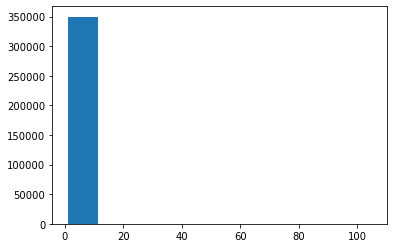

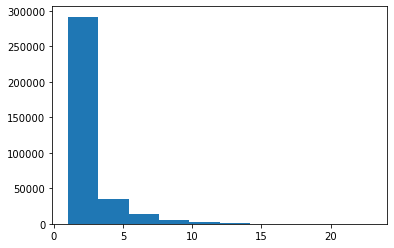

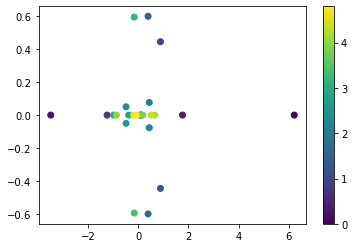

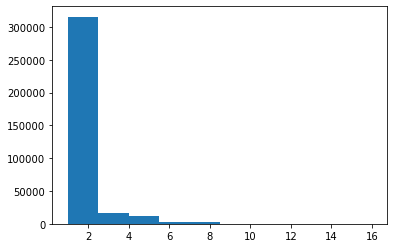

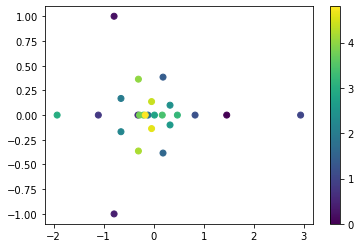

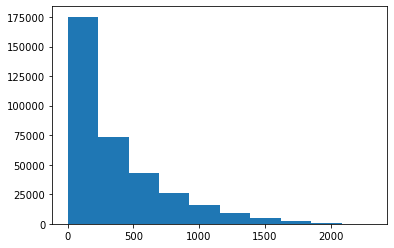

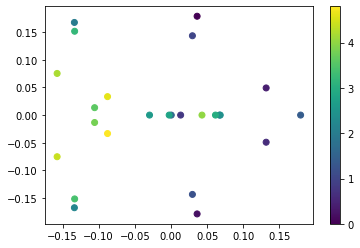

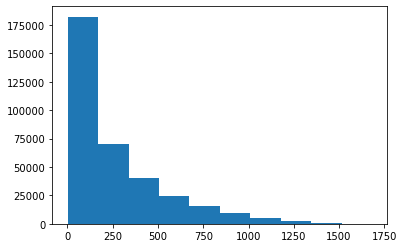

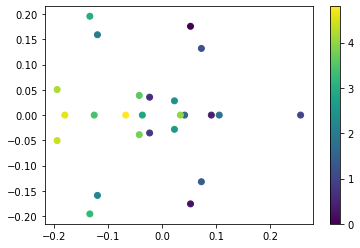

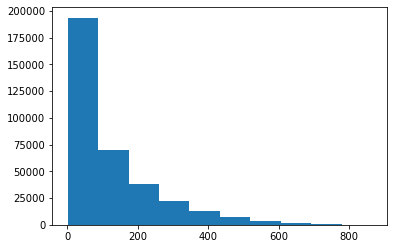

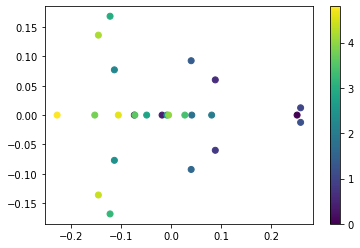

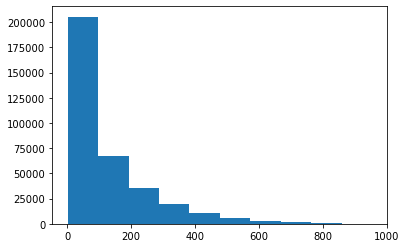

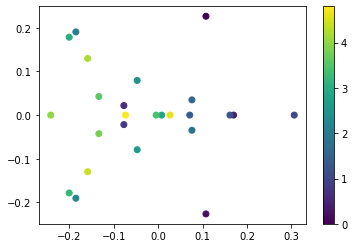

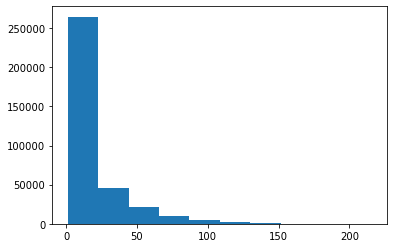

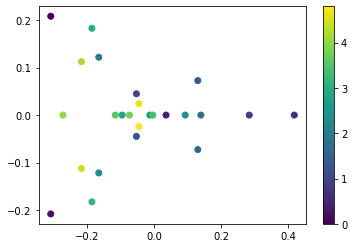

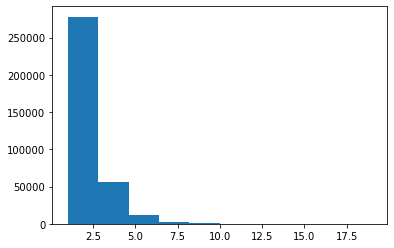

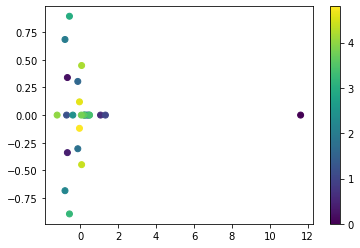

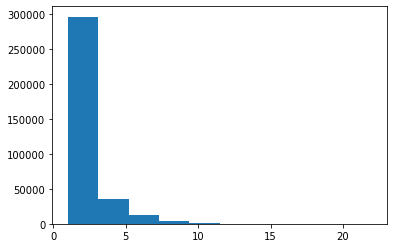

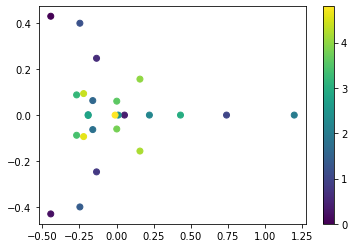

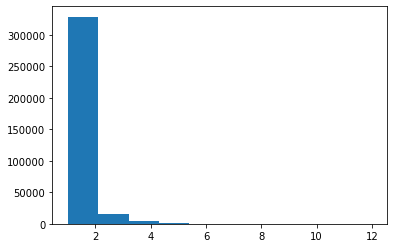

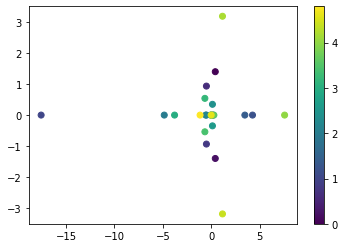

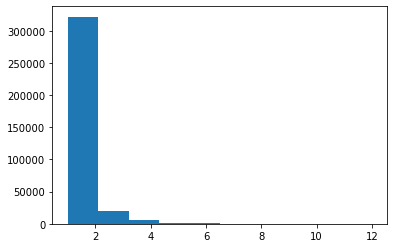

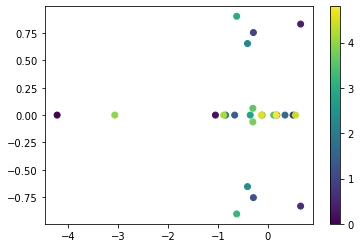

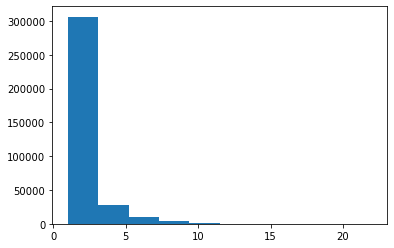

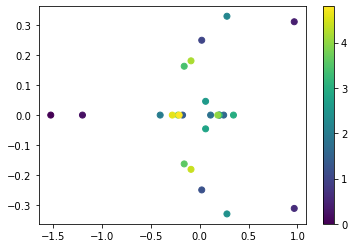

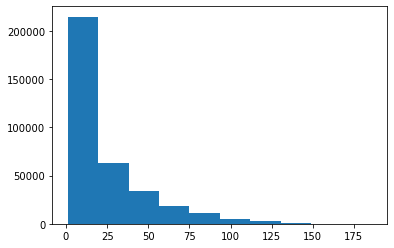

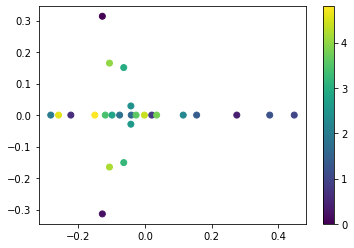

KeyboardInterrupt: 

In [20]:
for tdclfp in dclfp:
    tree = spatial.KDTree(np.array(tdclfp[::2,:]))
    radius = 100
    neighbors = tree.query_ball_tree(tree, radius)
    frequency = list(map(len, neighbors))
    loc = np.argmax(frequency)
    plt.figure()
    plt.hist(frequency)
    plt.show()
    valid_neigh = np.array(neighbors[loc])[[np.where(np.diff(neighbors[loc])>100)[0]]]
    samples = []
    for neigh in valid_neigh:
        samples.append(tdclfp[::2,:][neigh:neigh+200])
    if samples:
        samples=np.stack(samples)
    else:
        continue
    # [time,instance,dim]
    samples = samples.transpose([1,0,2])
    As,frame_ass = local_linear.local_linear(samples,l_frame=6)
    ne = []
    ee = []
    mv = []
    for A in As:
        e,v = np.linalg.eig(A[1:6,1:6])
        ne.append(len(np.where(np.real(e)>0)[0]))
        ee.append(e)
        mv.append(v)
    ee = np.stack(ee)
    plt.figure();
    plt.scatter(np.real(ee[:5]),np.imag(ee[:5]),c=np.arange(0,5,1/5))
    plt.colorbar()
    plt.show()


In [18]:
neighbors

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19, 58539],
 [20, 58540],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28, 29],
 [28, 29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40, 50741],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49, 144917],
 [50],
 [51],
 [52],
 [53],
 [54],
 [55],
 [56],
 [57],
 [58],
 [59],
 [60],
 [61],
 [62],
 [63],
 [64],
 [65],
 [66],
 [67],
 [68],
 [69],
 [70],
 [71],
 [72],
 [73],
 [74],
 [75],
 [76],
 [77],
 [78],
 [79],
 [80],
 [81],
 [82],
 [83],
 [84],
 [85],
 [86],
 [87],
 [88],
 [89],
 [90],
 [91],
 [92],
 [93],
 [94],
 [95],
 [96],
 [97],
 [98],
 [99],
 [100],
 [101],
 [102],
 [103],
 [104],
 [105],
 [106],
 [107],
 [108],
 [109],
 [110],
 [111],
 [112],
 [113],
 [114],
 [115],
 [116],
 [117],
 [118],
 [119],
 [120],
 [121],
 [122],
 [123],
 [124],
 [125],
 [126],
 [127],
 [128, 174276],
 [129],
 [130],
 [131],
 [132],
 